# sparkly

Look... I have no imagination for titles, not after spending 18 hours on this, most of it going down deadends. ipywidgets seemed too finicky for what I wanted this thing to do. All I really want to do is get my dataframes tiny sparklines when I'm doing my exploratory analysis, with as little pain as possible for _me_ and without making changes to the original dataframe. I wanted it to be something I could use at work, too.

## Getting Started

These instructions will get your sparkly sparkline thing going. Put the python file somewhere convenient. Then:

```
import sparkly
```

Yes, that's it. I will make it fancier in the future, but you'll have to catch me at a time when I have a better handle on python101 stuff like classes and modules...

## Dependencies

* Matplotlib
* pandas
* numpy
* ipython

### Wait, how do I view a sparkline on my data?

```
sparkly.display(df)
```
Some of the optional flags available:
```
sparkly.display(df, order=None, max_rows=10, max_cols=999)
```
* dataframe for generating sparklines. Plots generated are based on order within the dataframe (meaning dataframe sorts will generate different sparklines if you do not specify some order), see below
* order: Series/List/etc of same length as df for x-axis ordering, e.g., use df.index if you want the chart to be sorted by df.index values. I'm not too clear about what this accepts... as long as matplotlib will accept it for an x axis, then sure, my thing will accept it too
* max_rows: max rows to display. Default is 10.
* max_cols: max columns to display. Default is basically all because I'm assuming you wanna see the sparklines for all of it at once or something

## Examples

### A straightforward df with no multiindex columns or indexes.

,AssetClass,AssetClassSubType,Date,UMBSTradeCount,UMBSUniqueID,UMBS$Trades,FNMATradeCount,FNMAUniqueID,FNMA$Trades,FHLMCTradeCount,FHLMCUniqueID,FHLMC$Trades,GNMATradeCount,GNMAUniqueID,GNMA$Trades,OtherTradeCount,OtherUniqueID,Other$Trades
0,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 15Y,2019-08-01,1029.0,16.0,10367700.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-08-01,6773.0,24.0,186632371.9,0.0,0.0,0.0,5.0,4.0,102700.0,2015.0,35.0,41183055.9,0.0,0.0,0.0
2,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",OTHER,2019-08-01,0.0,0.0,0.0,17.0,10.0,372127.4,0.0,0.0,0.0,16.0,9.0,279696.4,0.0,0.0,0.0
3,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 15Y,2019-08-01,276.0,149.0,504236.2,43.0,30.0,394939.5,139.0,79.0,82820.6,25.0,13.0,12427.5,0.0,0.0,0.0
4,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 30Y,2019-08-01,831.0,367.0,6911505.6,36.0,21.0,432535.6,377.0,157.0,673000.4,552.0,265.0,5600971.4,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 30Y,2019-10-31,1032.0,527.0,10939302.7,44.0,30.0,317049.0,303.0,138.0,317691.0,627.0,334.0,3480925.4,0.0,0.0,0.0
581,AGENCY PASS-THRU (SPECIFIED),ADJUSTABLE/HYBRID,2019-10-31,0.0,0.0,0.0,32.0,12.0,16349.8,6.0,4.0,62976.8,6.0,4.0,6742.0,12.0,4.0,5176.3
582,AGENCY PASS-THRU (SPECIFIED),OTHER,2019-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
583,AGENCY CMO,P&I,2019-10-31,0.0,0.0,0.0,280.0,145.0,205136.0,297.0,152.0,194484.0,209.0,117.0,78706.8,18.0,11.0,34884.2

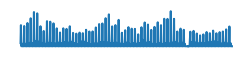
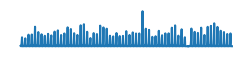
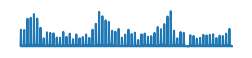
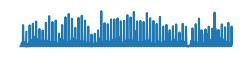
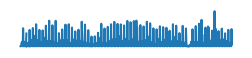
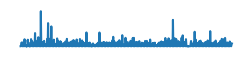
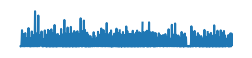
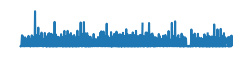
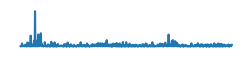
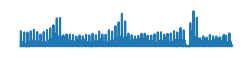
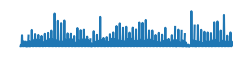
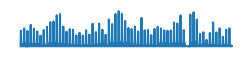
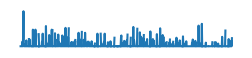
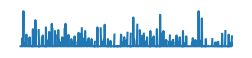
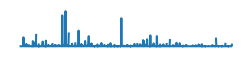

In [1]:
import pandas as pd
import numpy as np
import datetime
import sparkly
import random

df = pd.read_csv('samplefile.csv')
df.Date = pd.to_datetime(df.Date, format='%Y%m%d')
df.set_index(['AssetClass', 'AssetClassSubType', 'Date'], inplace=True)
df.replace('*', '', inplace=True)
df = df.apply(pd.to_numeric)
df.reset_index(inplace=True)

sparkly.display(df)

### A straightforward df, but with some sorting already done.

,AssetClass,AssetClassSubType,Date,UMBSTradeCount,UMBSUniqueID,UMBS$Trades,FNMATradeCount,FNMAUniqueID,FNMA$Trades,FHLMCTradeCount,FHLMCUniqueID,FHLMC$Trades,GNMATradeCount,GNMAUniqueID,GNMA$Trades,OtherTradeCount,OtherUniqueID,Other$Trades
584,AGENCY CMO,IO/PO,2019-10-31,0.0,0.0,0.0,29.0,17.0,303877.5,34.0,16.0,321216.4,39.0,21.0,336688.5,NaN,NaN,NaN
231,AGENCY PASS-THRU (SPECIFIED),OTHER,2019-09-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
230,AGENCY PASS-THRU (SPECIFIED),ADJUSTABLE/HYBRID,2019-09-06,0.0,0.0,0.0,9.0,6.0,84252.2,38.0,19.0,974.0,7.0,4.0,31394.5,10.0,8.0,18077.3
421,AGENCY CMO,P&I,2019-10-07,0.0,0.0,0.0,286.0,186.0,2906197.0,275.0,148.0,1453406.5,237.0,144.0,3565779.5,10.0,7.0,21417.8
422,AGENCY CMO,IO/PO,2019-10-07,0.0,0.0,0.0,38.0,25.0,136622.5,32.0,22.0,166409.6,32.0,21.0,234756.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-09-10,10244.0,29.0,275058506.3,0.0,0.0,0.0,46.0,10.0,398950.0,2132.0,27.0,70941549.4,0.0,0.0,0.0
46,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-08-08,10572.0,27.0,312674777.7,0.0,0.0,0.0,45.0,8.0,1344968.2,1901.0,31.0,39065516.8,0.0,0.0,0.0
37,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-08-07,10987.0,28.0,363701507.6,0.0,0.0,0.0,25.0,6.0,1283690.0,2194.0,32.0,46713012.0,0.0,0.0,0.0
415,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-10-07,11254.0,29.0,395799855.8,0.0,0.0,0.0,48.0,10.0,384107.0,1713.0,29.0,41745567.8,0.0,0.0,0.0

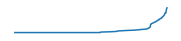
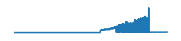
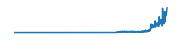
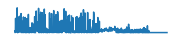
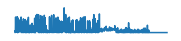
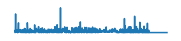
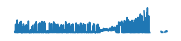
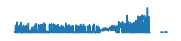
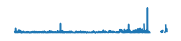
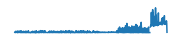
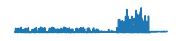
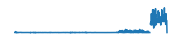
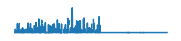
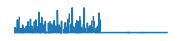
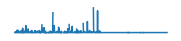

In [11]:
df2 = df.copy()
df2.sort_values(by='UMBSTradeCount', inplace=True)

sparkly.display(df2)

### A display with a multiindex on the rows.


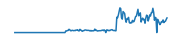
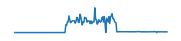
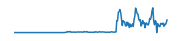
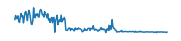
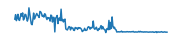
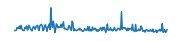
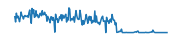
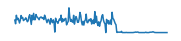
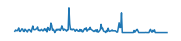
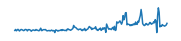
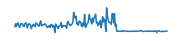
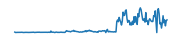
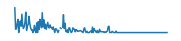
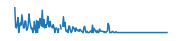
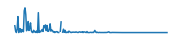

In [12]:
df3 = df.copy()
df3 = df2.groupby(['AssetClass', 'Date']).mean()

sparkly.display(df3)

### A display with multiindex columns.


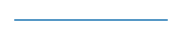
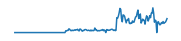
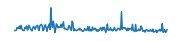

In [13]:
df4 = df.copy()
df4 = df4.groupby(['AssetClass', 'Date']).agg({
    'UMBSTradeCount': [min, max], 
    'FNMA$Trades': np.mean
})

sparkly.display(df4)

### A display where the sparklines have a specified x-axis for ordering, rather than order in the dataframe. In this case I generated a randomly ordered index.

,AssetClass,AssetClassSubType,Date,UMBSTradeCount,UMBSUniqueID,UMBS$Trades,FNMATradeCount,FNMAUniqueID,FNMA$Trades,FHLMCTradeCount,FHLMCUniqueID,FHLMC$Trades,GNMATradeCount,GNMAUniqueID,GNMA$Trades,OtherTradeCount,OtherUniqueID,Other$Trades,counter
0,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 15Y,2019-08-01,1029.0,16.0,10367700.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1786075
1,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",SINGLE FAMILY 30Y,2019-08-01,6773.0,24.0,186632371.9,0.0,0.0,0.0,5.0,4.0,102700.0,2015.0,35.0,41183055.9,0.0,0.0,0.0,683393
2,"AGENCY PASS-THRU (TBA, STIP, $ ROLLS)",OTHER,2019-08-01,0.0,0.0,0.0,17.0,10.0,372127.4,0.0,0.0,0.0,16.0,9.0,279696.4,0.0,0.0,0.0,102151
3,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 15Y,2019-08-01,276.0,149.0,504236.2,43.0,30.0,394939.5,139.0,79.0,82820.6,25.0,13.0,12427.5,0.0,0.0,0.0,1526217
4,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 30Y,2019-08-01,831.0,367.0,6911505.6,36.0,21.0,432535.6,377.0,157.0,673000.4,552.0,265.0,5600971.4,0.0,0.0,0.0,592600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,AGENCY PASS-THRU (SPECIFIED),SINGLE FAMILY 30Y,2019-10-31,1032.0,527.0,10939302.7,44.0,30.0,317049.0,303.0,138.0,317691.0,627.0,334.0,3480925.4,0.0,0.0,0.0,1242143
581,AGENCY PASS-THRU (SPECIFIED),ADJUSTABLE/HYBRID,2019-10-31,0.0,0.0,0.0,32.0,12.0,16349.8,6.0,4.0,62976.8,6.0,4.0,6742.0,12.0,4.0,5176.3,1465263
582,AGENCY PASS-THRU (SPECIFIED),OTHER,2019-10-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1207317
583,AGENCY CMO,P&I,2019-10-31,0.0,0.0,0.0,280.0,145.0,205136.0,297.0,152.0,194484.0,209.0,117.0,78706.8,18.0,11.0,34884.2,1071282

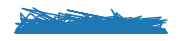
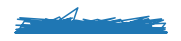
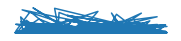
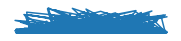
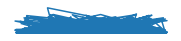
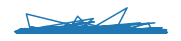
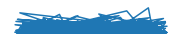
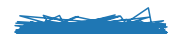
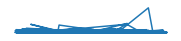
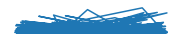
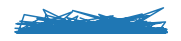
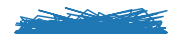
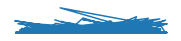
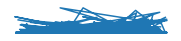
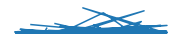
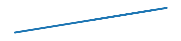

In [10]:
df5 = df.copy()
random_counter = [random.randint(1, 2000000) for i in df5.index]
df5['counter'] = random_counter

sparkly.display(df=df5, order=df5['counter'])

A display that truncates view if all you wanna do is see a headlike summary.

In [ ]:
sparkly.display(df=df, max_rows=5, max_cols=5)

And that's all, folks!

### Next Steps

* Building better error handling... there's, like, none in this. What's this 'try, except' thing you speak of? Unit testing? Whazzat? 
* Being able to use pandas defaults for max row, max column display
* Being able to generate charts on row level... this might need some thought as the first data set I tried this one had a million rows and it was a Bad Idea
* Getting extra credit for this??? I know it's not an ipywidget and it isn't pandas but it works, right?

# Author

* Sharon Sung, sungsh@umich.edu
